# Which Louisville zipcode has the worst health inspection ratings?

### Data gathered from https://data.louisvilleky.gov

In [1]:
import os
import sqlite3 as sql
import csv
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Creating database and importing data from .csv into SQL

In [2]:
conn = sql.connect('health.db')
health = pd.read_csv('violations.csv', encoding = 'ISO-8859-1')
health.to_sql('health',conn, if_exists = 'replace')

### Importing data into a new Pandas dataframe using SQL

In [3]:
df = pd.read_sql_query("""SELECT * FROM health""", conn)

### Quick check of how many rows and columns I have

In [4]:
df.shape

(72158, 15)

### Check datatype of each column

In [5]:
df.dtypes

index            int64
match           object
id               int64
date             int64
name            object
address         object
city            object
state           object
zip              int64
latitude       float64
longitude      float64
number          object
code            object
description     object
score            int64
dtype: object

In [6]:
df

,index,match,id,date,name,address,city,state,zip,latitude,longitude,number,code,description,score
0,0,32140 20180718,32140,20180718,ARBYS #5412,6216 BARDSTOWN RD,LOUISVILLE,KY,40291,38.155666,-85.590284,(502) 239-3203,None,"Floor improperly constructed, not draining, no...",0
1,1,32140 20180718,32140,20180718,ARBYS #5412,6216 BARDSTOWN RD,LOUISVILLE,KY,40291,38.155666,-85.590284,(502) 239-3203,None,Food/non-food contact surfaces not approved or...,0
2,2,32140 20180718,32140,20180718,ARBYS #5412,6216 BARDSTOWN RD,LOUISVILLE,KY,40291,38.155666,-85.590284,(502) 239-3203,None,Plumbing not maintained OR leaky faucet,0
3,3,32140 20180718,32140,20180718,ARBYS #5412,6216 BARDSTOWN RD,LOUISVILLE,KY,40291,38.155666,-85.590284,(502) 239-3203,None,"Improper disposal of sewage and waste, sewage ...",0
4,4,32140 20180718,32140,20180718,ARBYS #5412,6216 BARDSTOWN RD,LOUISVILLE,KY,40291,38.155666,-85.590284,(502) 239-3203,None,"Wall/Ceiling improperly constructed, not in go...",0
5,5,32534 20150105,32534,20150105,KRAZY DAVES NEIGHBORHOOD PUB AND GRILL,2817 DEL RIO PL,LOUISVILLE,KY,40220,38.214588,-85.654381,(502) 403-6101,None,"Floor improperly constructed, not draining, no...",0
6,6,32534 20150105,32534,20150105,KRAZY DAVES NEIGHBORHOOD PUB AND GRILL,2817 DEL RIO PL,LOUISVILLE,KY,40220,38.214588,-85.654381,(502) 403-6101,None,Improperly labeled food container,0
7,7,32534 20150105,32534,20150105,KRAZY DAVES NEIGHBORHOOD PUB AND GRILL,2817 DEL RIO PL,LOUISVILLE,KY,40220,38.214588,-85.654381,(502) 403-6101,None,Non-food contact surfaces of equipment/utensil...,0
8,8,32534 20150105,32534,20150105,KRAZY DAVES NEIGHBORHOOD PUB AND GRILL,2817 DEL RIO PL,LOUISVILLE,KY,40220,38.214588,-85.654381,(502) 403-6101,None,"Outer opening not sealed (doors, hole in wall",0
9,9,32534 20150105,32534,20150105,KRAZY DAVES NEIGHBORHOOD PUB AND GRILL,2817 DEL RIO PL,LOUISVILLE,KY,40220,38.214588,-85.654381,(502) 403-6101,None,"Wall/Ceiling improperly constructed, not in go...",0


### Rename columns to more reader-friendly names

In [7]:
df.rename(
    columns={
        'match':'Match',
        'id':'ID',
        'date':'Date',
        'name':'Name',
        'address':'Address',
        'city':'City',
        'state':'State',
        'zip':'Zip',
        'latitude':'Lat',
        'longitude':'Lon',
        'number':'Phone',
        'code':'Code',
        'description':'Violation',
        'score':'Score'
    },
    inplace=True)

### Drop columns I won't need

In [8]:
df.drop(['index', 'Match', 'Lon', 'Lat', 'Code'], axis=1, inplace=True)

### Run a preliminary check of the 'Score' column, as that will be my primary focus in the project.

In [9]:
df['Score'].describe()

count    72158.000000
mean        91.873237
std         11.385398
min          0.000000
25%         91.000000
50%         95.000000
75%         96.000000
max        100.000000
Name: Score, dtype: float64

### Taking a look at what unique values are actually present in the 'Score' column. This is where I notice that 57 seems to be the lowest score in the dataset, and 0 is an outlier that I will disregard and remove from my dataframe.

In [10]:
uscores = df['Score'].unique()
uscores.sort()
print(uscores)

[  0  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100]


In [11]:
pd.read_sql_query("""SELECT count(Score) as 'Instances of Zero Score' FROM health 
                        WHERE Score = 0 
                        GROUP BY Score
                        """, conn)

,Instances of Zero Score
0,812


In [12]:
df = df[df.Score != 0]

In [13]:
df['Score'].describe()

count    71346.000000
mean        92.918860
std          5.826069
min         57.000000
25%         92.000000
50%         95.000000
75%         96.000000
max        100.000000
Name: Score, dtype: float64

In [14]:
df = df.sort_values(by=['Name','Date'], ascending=False)
df

,ID,Date,Name,Address,City,State,Zip,Phone,Violation,Score
44414,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Improperly labeled food container,95
44415,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,No hair restraints worn,95
44416,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Thermometers not provided or visible,95
62096,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Dispensing utensils improperly stored during use,97
62097,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Food/non-food contact surfaces not approved or...,97
69109,45260,20190221,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Non-food contact surfaces of equipment/utensil...,99
12294,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Presence of insects, rodents, turtles or birds",90
12295,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Thermometers not provided or visible,90
12296,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Improper storage, preparation, display, servic...",90
12297,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Toilet rooms not enclosed OR doors not self-cl...,90


In [15]:
df['Matchcode'] = df['Name'] + ' ' + df['Date'].map(str)

In [16]:
df

,ID,Date,Name,Address,City,State,Zip,Phone,Violation,Score,Matchcode
44414,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Improperly labeled food container,95,ZUMA KING 20190227
44415,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,No hair restraints worn,95,ZUMA KING 20190227
44416,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Thermometers not provided or visible,95,ZUMA KING 20190227
62096,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Dispensing utensils improperly stored during use,97,ZUMA KING 20180814
62097,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Food/non-food contact surfaces not approved or...,97,ZUMA KING 20180814
69109,45260,20190221,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Non-food contact surfaces of equipment/utensil...,99,ZS OYSTER BAR AND STEAKHOUSE 20190221
12294,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Presence of insects, rodents, turtles or birds",90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12295,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Thermometers not provided or visible,90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12296,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Improper storage, preparation, display, servic...",90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12297,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Toilet rooms not enclosed OR doors not self-cl...,90,ZS OYSTER BAR AND STEAKHOUSE 20190214


In [17]:
df = df.sort_values(by=['Matchcode'], ascending=False)

df

,ID,Date,Name,Address,City,State,Zip,Phone,Violation,Score,Matchcode
44414,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Improperly labeled food container,95,ZUMA KING 20190227
44416,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Thermometers not provided or visible,95,ZUMA KING 20190227
44415,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,No hair restraints worn,95,ZUMA KING 20190227
62096,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Dispensing utensils improperly stored during use,97,ZUMA KING 20180814
62097,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Food/non-food contact surfaces not approved or...,97,ZUMA KING 20180814
69109,45260,20190221,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Non-food contact surfaces of equipment/utensil...,99,ZS OYSTER BAR AND STEAKHOUSE 20190221
12294,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Presence of insects, rodents, turtles or birds",90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12295,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Thermometers not provided or visible,90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12296,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Improper storage, preparation, display, servic...",90,ZS OYSTER BAR AND STEAKHOUSE 20190214
12297,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Toilet rooms not enclosed OR doors not self-cl...,90,ZS OYSTER BAR AND STEAKHOUSE 20190214


In [18]:
df = df.drop_duplicates(subset=['Matchcode'], keep='first')

df

,ID,Date,Name,Address,City,State,Zip,Phone,Violation,Score,Matchcode
44414,105748,20190227,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Improperly labeled food container,95,ZUMA KING 20190227
62096,105748,20180814,ZUMA KING,3927 DIXIE HWY,LOUISVILLE,KY,40216,(502) 822-3988,Dispensing utensils improperly stored during use,97,ZUMA KING 20180814
69109,45260,20190221,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Non-food contact surfaces of equipment/utensil...,99,ZS OYSTER BAR AND STEAKHOUSE 20190221
12294,45260,20190214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Presence of insects, rodents, turtles or birds",90,ZS OYSTER BAR AND STEAKHOUSE 20190214
46861,45260,20180813,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,"Dishwashing facilities improperly operated, OR...",96,ZS OYSTER BAR AND STEAKHOUSE 20180813
63425,45260,20180227,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Improperly labeled food container,98,ZS OYSTER BAR AND STEAKHOUSE 20180227
69110,45260,20170919,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Plumbing not maintained OR leaky faucet,99,ZS OYSTER BAR AND STEAKHOUSE 20170919
37846,45260,20170214,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Toilet rooms not enclosed OR doors not self-cl...,95,ZS OYSTER BAR AND STEAKHOUSE 20170214
19048,45260,20160929,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Cooling or warming unit(s) not holding at prop...,92,ZS OYSTER BAR AND STEAKHOUSE 20160929
37848,45260,20160125,ZS OYSTER BAR AND STEAKHOUSE,101 WHITTINGTON PKWY,LOUISVILLE,KY,40222,(502) 429-8000,Improperly labeled food container,95,ZS OYSTER BAR AND STEAKHOUSE 20160125


In [19]:
df = df.sort_values(by=['Name','Score'], ascending=False)

In [20]:
uzips = df['Zip'].unique()
uzips.sort()
print(uzips)

[40018 40027 40041 40059 40118 40177 40201 40202 40203 40204 40205 40206
 40207 40208 40209 40210 40211 40212 40213 40214 40215 40216 40217 40218
 40219 40220 40222 40223 40225 40228 40229 40232 40234 40241 40242 40243
 40245 40253 40258 40272 40291 40299 40541]


### Found one zip that was not a Louisville zip code ("40541"). Did some research using SQL to pull record(s) for research.

In [21]:
pd.read_sql_query("""SELECT count(ID), Name, Address FROM health 
                        WHERE Zip = 40541
                        GROUP BY Name
                        """, conn)

,count(ID),name,address
0,62,TUMBLEWEED #521,3550 SPRINGHURST COMMONS DR


### After Googling the address, it appears that someone fat-fingered the zip for this record...should be "40241." I will correct it in the dataframe. That should help rein in my visualization a bit.

In [22]:
df['Zip'].replace(
    to_replace = 40541,
    value = 40241,
    inplace=True
)

In [23]:
uzipsagain = df['Zip'].unique()
uzipsagain.sort()
print(uzipsagain)

[40018 40027 40041 40059 40118 40177 40201 40202 40203 40204 40205 40206
 40207 40208 40209 40210 40211 40212 40213 40214 40215 40216 40217 40218
 40219 40220 40222 40223 40225 40228 40229 40232 40234 40241 40242 40243
 40245 40253 40258 40272 40291 40299]


In [24]:
df['Score'].describe()

count    23693.000000
mean        95.343604
std          4.051832
min         57.000000
25%         94.000000
50%         96.000000
75%         98.000000
max        100.000000
Name: Score, dtype: float64

In [25]:
df = df[df.Score <= 94]
df['Score'].describe()

count    6387.000000
mean       90.525599
std         4.935928
min        57.000000
25%        90.000000
50%        92.000000
75%        94.000000
max        94.000000
Name: Score, dtype: float64

In [26]:
df = df[df.Score <= 90]
df['Score'].describe()

count    1947.000000
mean       84.944530
std         5.708579
min        57.000000
25%        82.000000
50%        87.000000
75%        90.000000
max        90.000000
Name: Score, dtype: float64

In [27]:
lows = df[df.Score <= 82]
lows['Score'].describe()

count    527.000000
mean      77.074004
std        4.650956
min       57.000000
25%       75.000000
50%       78.000000
75%       81.000000
max       82.000000
Name: Score, dtype: float64

In [28]:
lows['Counts'] = lows.groupby(['Zip'])['Zip'].transform('count')

lowviz = lows[['Zip','Counts']]

lowviz = lowviz.drop_duplicates(subset=['Zip'], keep='first')

lowviz = lowviz.sort_values(by=['Counts'], ascending=False)

lowviz

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Zip,Counts
5319,40219,67
3170,40207,43
5472,40202,43
3224,40204,35
4223,40216,34
4527,40205,31
1045,40214,28
5205,40213,25
2875,40258,25
3694,40218,24


[Text(0, 0, '40027'),
 Text(0, 0, '40059'),
 Text(0, 0, '40118'),
 Text(0, 0, '40202'),
 Text(0, 0, '40203'),
 Text(0, 0, '40204'),
 Text(0, 0, '40205'),
 Text(0, 0, '40206'),
 Text(0, 0, '40207'),
 Text(0, 0, '40208'),
 Text(0, 0, '40209'),
 Text(0, 0, '40210'),
 Text(0, 0, '40211'),
 Text(0, 0, '40213'),
 Text(0, 0, '40214'),
 Text(0, 0, '40215'),
 Text(0, 0, '40216'),
 Text(0, 0, '40217'),
 Text(0, 0, '40218'),
 Text(0, 0, '40219'),
 Text(0, 0, '40220'),
 Text(0, 0, '40222'),
 Text(0, 0, '40223'),
 Text(0, 0, '40228'),
 Text(0, 0, '40229'),
 Text(0, 0, '40241'),
 Text(0, 0, '40243'),
 Text(0, 0, '40245'),
 Text(0, 0, '40258'),
 Text(0, 0, '40272'),
 Text(0, 0, '40291'),
 Text(0, 0, '40299')]

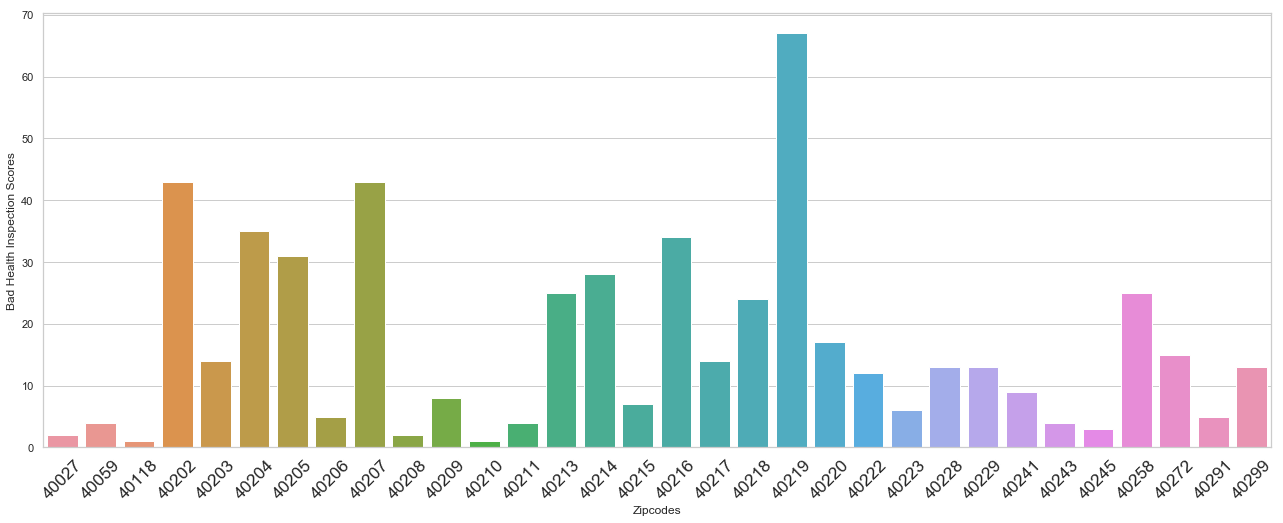

In [30]:
sns.set(style='whitegrid')
plt.figure(figsize=(22,8))
chart = sns.barplot(x='Zip', y='Counts', data=lowviz)
chart.set(xlabel="Zipcodes", ylabel='Bad Health Inspection Scores')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='center', 
                      fontweight='light', fontsize='x-large')